<h1>Credit Card Fraud Predictions</h1>

<h2>Project Overview</h2>

<p>In this project, I have compared various classification models to determine which performs best with the available data.</p>

<ul>
    <li>Models were trained on imbalanced data, followed by hyperparameter tuning.</li>
    <li>SMOTE (Synthetic Minority Over-sampling Technique) was applied to balance the dataset.</li>
</ul>

<h3>Classification Models Used:</h3>
<ul>
    <li>Logistic Regression</li>
    <li>Neural Network</li>
    <li>Random Forest</li>
    <li>XGBoost</li>
</ul>

<h3>Dataset Information</h3>
<p><strong>Source:</strong> <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data" target="_blank">Kaggle - Credit Card Fraud Detection</a></p>
<p>The dataset contains only numerical input variables obtained through PCA transformation. The only real-world attributes are:</p>
<ul>
    <li><strong>Time:</strong> The time elapsed between transactions.</li>
    <li><strong>Amount:</strong> The transaction amount.</li>
</ul>
<p>The target variable <code>Class</code> is categorical:</p>
<ul>
    <li><code>0</code> - Non-Fraudulent</li>
    <li><code>1</code> - Fraudulent</li>
</ul>


Import libraries

In [246]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection  import train_test_split

custom_palette = sns.color_palette("Set2")

In [142]:
df = pd.read_csv('creditcard.csv')

<h2>Exploratory Data Analysis (EDA)</h2>

<h3>Dataset Overview</h3>
<ul>
    <li><code>df.head()</code> - Displays the first five rows of the dataset.</li>
    <li><code>df.dtypes</code> - Shows the data types of each column.</li>
    <li><code>df.info()</code> - Provides an overview of the dataset, including column names, non-null counts, and data types.</li>
    <li><code>df.describe()</code> - Generates summary statistics such as mean, standard deviation, min, and max values for numerical features.</li>
</ul>

<h3>Class Distribution</h3>
<p>The dataset is highly imbalanced. The percentage of fraudulent and non-fraudulent transactions is calculated as follows:</p>

<pre>
percent_fraud = df.Class.sum() / df.Class.count() * 100
percent_non_fraud = (df.Class.count() - df.Class.sum()) / df.Class.count() * 100
</pre>

<p><strong>Results:</strong></p>
<ul>
    <li><strong>Fraudulent Transactions:</strong> <code>percent_fraud</code>%</li>
    <li><strong>Non-Fraudulent Transactions:</strong> <code>percent_non_fraud</code>%</li>
</ul>

<p>This analysis helps in understanding the dataset’s structure and class imbalance before proceeding with model training.</p>


In [143]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [144]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Insight : 
All data points are of same type float64 and only Class is an int64 variable

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28


Insights : 
There are no missing values in any columns

In [146]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Insights : 
Since these are PCA paramter the means are near 0 and std dev is near 1

In [147]:
percent_fraud = df.Class.sum() / df.Class.count()*100
percent_non_fraud = (df.Class.count() - df.Class.sum())/ df.Class.count()*100
print(' percentage of fraudulant transections     : ', percent_fraud, '\n', 'percentage of non fraudulant transections : ', percent_non_fraud)

 percentage of fraudulant transections     :  0.1727485630620034 
 percentage of non fraudulant transections :  99.82725143693798


<h2>Transaction Class Distribution</h2>

<p>This section processes and visualizes the distribution of fraudulent and non-fraudulent transactions.</p>

<h3>Steps:</h3>
<ul>
    <li>Grouped the dataset by <code>Class</code> and counted the number of transactions.</li>
    <li>Renamed the column <code>Time</code> to <code>Count</code> for better readability.</li>
    <li>Converted the <code>Class</code> column to an object type.</li>
    <li>Replaced numeric class labels:
        <ul>
            <li><code>0</code> → <strong>Non-Fraudulent</strong></li>
            <li><code>1</code> → <strong>Fraudulent</strong></li>
        </ul>
    </li>
</ul>

<h3>Final DataFrame:</h3>
<pre>
Class_df
</pre>

<p>This transformation ensures that the class labels are more interpretable for further analysis and visualization.</p>


In [148]:
Class_df = df.groupby(['Class']).Time.count().reset_index()
Class_df.rename(columns = {'Time' : 'Count'}, inplace = True)

In [149]:
Class_df["Class"] = Class_df["Class"].astype("object")

Class_df.loc[0, "Class"] = "Non Fraudulant"
Class_df.loc[1, "Class"] = "Fraudulant"

In [150]:
Class_df

,Class,Count
0,Non Fraudulant,284315
1,Fraudulant,492


Insights : 
The data is very skewed and there are very few fraudulant transections and this may cause issue in training data

<h2>Visualizing Class Distribution and Transaction Time</h2>

<h3>1. Fraud vs. Non-Fraud Transaction Count</h3>
<p>We use a bar plot to visualize the number of fraudulent and non-fraudulent transactions.</p>

<pre>
sns.barplot(data=Class_df, x='Class', y='Count')
plt.show()
</pre>

<p>This helps understand the class imbalance in the dataset.</p>

<h3>2. Distribution of Transactions Over Time</h3>
<p>We analyze whether fraudulent transactions are concentrated at specific times.</p>

<ul>
    <li>Created boolean masks to separate fraud and non-fraud cases:</li>
    <pre>
fraud = df.Class == 1
nonfraud = df.C


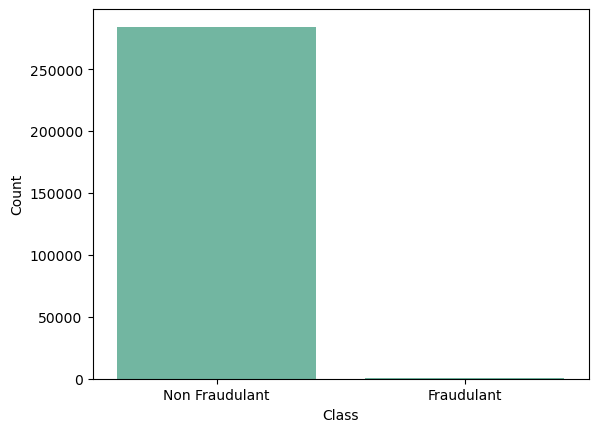

In [247]:
sns.barplot(data = Class_df,x = 'Class', y = 'Count',color = custom_palette[0])
plt.show()

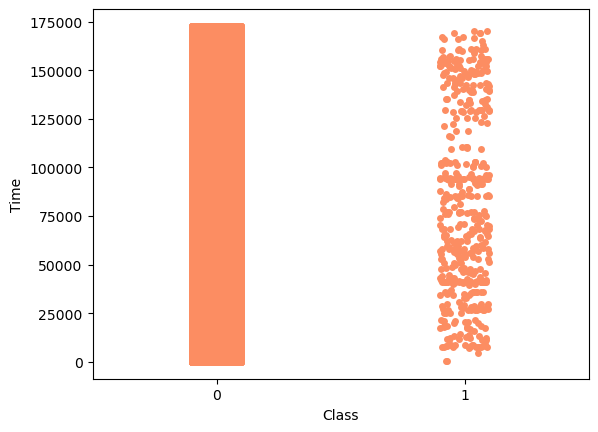

In [248]:
fraud = df.Class == 1
nonfraud = df.Class == 0

sns.stripplot(data = df, y = 'Time', x = 'Class',color = custom_palette[1])
plt.show()

Insigths : The Fraud cases are uniformly distributed over time

<h2>Feature Correlation Analysis</h2>

<h3>1. Correlation Matrix Heatmap</h3>
<p>We compute and visualize the correlation between numerical features using a heatmap.</p>

<pre>
mat = df.corr()

sns.heatmap(mat, cmap='coolwarm')
plt.show()
</pre>

<p>This helps identify relationships between different variables and detect multicollinearity.</p>

<h3>2. Correlation of Features with Class</h3>
<p>We analyze how strongly each feature is correlated with fraud occurrence.</p>

<pre>
plt.bar(x=mat.columns[1:28], height=mat.Class[1:28])
plt.xticks(mat.columns[1:28], rotation=90)
plt.show()
</pre>

<p>This bar plot highlights the features most relevant for fraud detection.</p>


In [153]:
mat = df.corr()

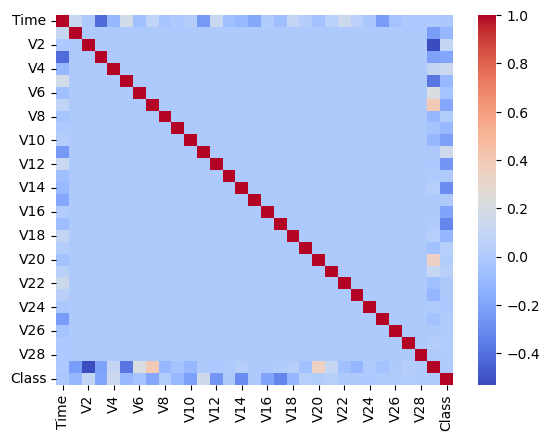

In [154]:
sns.heatmap(mat, cmap='coolwarm')

plt.show()

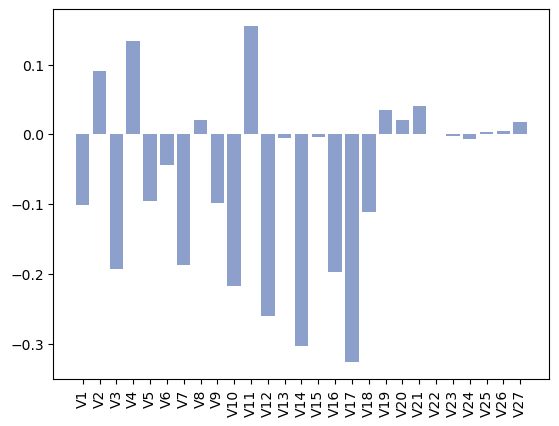

In [249]:
plt.bar(x = mat.columns[1:28], height = mat.Class[1:28],color = custom_palette[2])
plt.xticks(mat.columns[1:28],rotation = 90)
plt.show()

Insights : The variable V17,V14 and V12 are highly correlated to Class variable

<h2>Data Splitting and Normalization for Model Training</h2>

<h3>1. Feature Selection</h3>
<ul>
    <li><code>X</code>: All features except 'Time' and 'Class'.</li>
    <li><code>y</code>: Target variable ('Class').</li>
</ul>

<pre>
y = df.iloc[:, -1]
x = df.iloc[:, 1:-1]
</pre>

<h3>2. Splitting the Data</h3>
<p>We split the dataset into training (60%), validation (20%), and test (20%) sets.</p>

<pre>
x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
x_train, x
</pre>

<h3>3. Data Normalization</h3>
<p>We normalize input data (x) by standard normal scaling</p>
<pre>
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)
</pre>


<h3>4. Class Weight calculation </h3>
<p>We calculate class weights to train models based on weights</p>
<pre>
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}
</pre>

In [156]:
y = df.iloc[:,-1].to_numpy()
x = df.iloc[:,1:-1].to_numpy()

In [157]:
y.sum()

492

In [158]:
x_tr , x_test , y_tr , y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)
x_train , x_val , y_train , y_val = train_test_split(x_tr,y_tr,test_size = 0.25,random_state = 40)

In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [160]:
data = {'x_train' : x_train_scaled , 'y_train' : y_train,
        'x_test' : x_test_scaled, 'y_test' : y_test,
        'x_val' : x_val_scaled, 'y_val' : y_val}

In [161]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
pos = y_train.sum()
total = y_train.shape[0]
neg = total - pos

weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 291.61


In [162]:
print("Fraudual cases in Training set : " , y_train.sum() ,"\nPercentage of fraudual cases in Training set : " , y_train.sum()/y_train.shape[0] * 100)
print("Fraudual cases in Validation set : " , y_val.sum() ,"\nPercentage of fraudual cases in Validation set : " , y_val.sum()/y_val.shape[0] * 100)
print("Fraudual cases in Test set : " , y_test.sum() ,"\nPercentage of fraudual cases in Test set : " , y_test.sum()/y_test.shape[0] * 100)

Fraudual cases in Training set :  293 
Percentage of fraudual cases in Training set :  0.17146234558147974
Fraudual cases in Validation set :  102 
Percentage of fraudual cases in Validation set :  0.17906674625188723
Fraudual cases in Test set :  97 
Percentage of fraudual cases in Test set :  0.17028896457287315


insights : The test train split has equal combination of fraudulant to non-fraudulant cases

<h2>Model Threshold Optimization Function</h2>

<h3>1. Overview</h3>
<p>The function <code>get_threshold</code> determines the optimal decision threshold for a classification model by analyzing Precision-Recall (PR) curves. It selects the threshold that maximizes the F1-score on the validation dataset.</p>

<h3>2. Predictions Handling</h3>
<ul>
    <li>If the model supports probability predictions (<code>predict_proba</code>), it extracts probabilities for the positive class.</li>
    <li>Otherwise, it directly predicts class labels.</li>
    <li>Predictions are flattened if they have more than one dimension.</li>
</ul>

<pre>
if hasattr(model, "predict_proba"):
    y_probs_test = model.predict_proba(x_test)[:, 1]
    y_probs_val = model.predict_proba(x_val)[:, 1]
    y_probs_train = model.predict_proba(x_train)[:, 1]
else:
    y_probs_test = model.predict(x_test)
    y_probs_val = model.predict(x_val)
    y_probs_train = model.predict(x_train)

if isinstance(y_probs_test, np.ndarray) and y_probs_test.ndim > 1:
    y_probs_test = y_probs_test.flatten()
if isinstance(y_probs_val, np.ndarray) and y_probs_val.ndim > 1:
    y_probs_val = y_probs_val.flatten()
if isinstance(y_probs_train, np.ndarray) and y_probs_train.ndim > 1:
    y_probs_train = y_probs_train.flatten()
</pre>

<h3>3. Precision-Recall Curve and AUC Calculation</h3>
<p>The function computes precision-recall curves for training, validation, and test sets. It also calculates the Area Under the Curve (AUC) for each dataset.</p>

<pre>
precision_val, recall_val, thresholds_val = precision_recall_curve(y_val, y_probs_val)
pr_auc_val = auc(recall_val, precision_val)

precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_probs_test)
pr_auc_test = auc(recall_test, precision_test)

precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_probs_train)
pr_auc_train = auc(recall_train, precision_train)
</pre>

<h3>4. Optimal Threshold Selection</h3>
<ul>
    <li>Computes F1 scores for all threshold values in the validation set.</li>
    <li>Selects the threshold that maximizes the F1-score.</li>
    <li>Finds corresponding thresholds for test and train sets.</li>
</ul>

<pre>
f1_scores_val = 2 * (precision_val * recall_val) / (precision_val + recall_val)
f1_scores_val = np.nan_to_num(f1_scores_val)  # Handle NaN values

best_index = np.argmax(f1_scores_val)
best_threshold = thresholds_val[best_index]

test_index = (np.abs(thresholds_test - best_threshold)).argmin()
train_index = (np.abs(thresholds_train - best_threshold)).argmin()
</pre>

<h3>5. Visualization</h3>
<p>The function plots the Precision-Recall (PR) curves for training, validation, and test datasets. It marks the optimal F1-score point on each curve.</p>

<h3>6. Output and Return Values</h3>
<ul>
    <li>Prints the optimal threshold.</li>
    <li>Returns the best threshold that maximizes F1-score on the validation set.</li>
</ul>

<pre>
print("best_threshold : " , best_threshold)
return best_threshold
</pre>

<p>This function helps in selecting the most effective decision threshold based on validation set performance, ensuring a balance between precision and recall.</p>


In [252]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc , roc_curve

def get_threshold(model,data):
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']
    x_val = data['x_val']
    y_val = data['y_val']
    
    if hasattr(model, "predict_proba"):
        y_probs_test = model.predict_proba(x_test)[:, 1]
        y_probs_val = model.predict_proba(x_val)[:, 1]
        y_probs_train = model.predict_proba(x_train)[:, 1]
    else:
        y_probs_test = model.predict(x_test)
        y_probs_val = model.predict(x_val)
        y_probs_train = model.predict(x_train)
    
    if isinstance(y_probs_test, np.ndarray) and y_probs_test.ndim > 1:
        y_probs_test = y_probs_test.flatten()
    if isinstance(y_probs_val, np.ndarray) and y_probs_val.ndim > 1:
        y_probs_val = y_probs_val.flatten()
    if isinstance(y_probs_train, np.ndarray) and y_probs_train.ndim > 1:
        y_probs_train = y_probs_train.flatten()
    

    precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_probs_test)
    pr_auc_test = auc(recall_test, precision_test)
    
    precision_val, recall_val, thresholds_val = precision_recall_curve(y_val, y_probs_val)
    pr_auc_val = auc(recall_val, precision_val)
    
    precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_probs_train)
    pr_auc_train = auc(recall_train, precision_train)
    
    f1_scores_val = 2 * (precision_val * recall_val) / (precision_val + recall_val)
    f1_scores_val = np.nan_to_num(f1_scores_val)  # Handle NaN values
    
    # Find the threshold that maximizes F1 score
    best_index = np.argmax(f1_scores_val)
    best_threshold = thresholds_val[best_index]
    
    test_index = (np.abs(thresholds_test - best_threshold)).argmin()
    train_index = (np.abs(thresholds_train - best_threshold)).argmin()
    
    print("best_threshold : " , best_threshold)
    plt.figure(figsize=(8,6))
    plt.scatter(recall_val[best_index], precision_val[best_index],color = custom_palette[0], s=50, label="Max F1 Score For Val", edgecolors='black', zorder=3)
    plt.scatter(recall_test[test_index], precision_test[test_index],color = custom_palette[1], s=50, label="Max F1 Score For Val", edgecolors='black', zorder=3)
    plt.scatter(recall_train[train_index], precision_train[train_index],color = custom_palette[2], s=50, label="Max F1 Score For Val", edgecolors='black', zorder=3)
    plt.plot(recall_val, precision_val,color = custom_palette[3], lw=2, label=f'PR curve val (AUC = {pr_auc_val:.2f})')
    plt.plot(recall_test, precision_test,color = custom_palette[4], lw=2, label=f'PR curve test (AUC = {pr_auc_test:.2f})')
    plt.plot(recall_train, precision_train,color = custom_palette[5], lw=2, label=f'PR curve train (AUC = {pr_auc_train:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xticks(np.arange(0, 1.05, 0.05))
    plt.yticks(np.arange(0, 1.05, 0.05))
    plt.title('Precision-Recall (PR) Curve')
    plt.legend(loc='lower left')
    plt.grid(visible=True, which='both', axis='both')
    plt.show()

    return best_threshold

<h2>Model Evaluation Function</h2>

<h3>1. Overview</h3>
<p>The function <code>evaluate_model</code> computes performance metrics for classification models.</p>

<h3>2. Predictions Handling</h3>
<ul>
    <li>If the model supports probability predictions, it extracts probabilities for the positive class.</li>
    <li>Otherwise, it directly predicts class labels.</li>
    <li>Predictions are converted into binary labels using a 0.5 threshold.</li>
</ul>

<pre>
if hasattr(model, "predict_proba"):
    y_pred = model.predict_proba(x_test)[:, 1]
else:
    y_pred = model.predict(x_test)

if isinstance(y_pred, np.ndarray) and y_pred.ndim > 1:
    y_pred = y_pred.flatten()

y_pred_binary = (y_pred > threshold).astype(int)
</pre>

<h3>3. Performance Metrics</h3>
<p>The function calculates the following metrics:</p>

<pre>
precision = precision_score(y_test, y_pred_binary, average='binary')
recall = recall_score(y_test, y_pred_binary, average='binary')
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
balanced_acc = balanced_accuracy_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_true, y_pred)
</pre>

<h3>4. Output and Return Values</h3>
<ul>
    <li>Prints all metrics rounded to 4 decimal places.</li>
    <li>Displays a classification report.</li>
    <li>Returns a dictionary of results and the classification report.</li>
</ul>

<pre>
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

report = classification_report(y_test, y_pred_binary)
print(report)
return results, report
</pre>

<p>This function ensures a standardized way to evaluate and compare models in our classification task.</p>


In [233]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score,matthews_corrcoef, balanced_accuracy_score, classification_report

def evaluate_model(model, x_test, y_test,threshold):

    if hasattr(model, "predict_proba"):
        y_pred = model.predict_proba(x_test)[:, 1]
    else:
        y_pred = model.predict(x_test)
    
    if isinstance(y_pred, np.ndarray) and y_pred.ndim > 1:
        y_pred = y_pred.flatten()

    y_pred_binary = (y_pred > threshold).astype(int)
    
    precision = precision_score(y_test, y_pred_binary, average='binary')
    recall = recall_score(y_test, y_pred_binary, average='binary')
    accuracy = accuracy_score(y_test, y_pred_binary)
    f1 = f1_score(y_test,y_pred_binary)
    balanced_acc = balanced_accuracy_score(y_test, y_pred_binary)
    mcc = matthews_corrcoef(y_test, y_pred_binary)
    
    results = {
        "Precision": precision,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Balanced Accuracy": balanced_acc,
        "Recall" : recall,
        "Matthews Correlation Coefficient" : mcc
    }
    
    for metric, value in results.items():
        print(f"{metric}: {value:.4f}")
        
    report = classification_report(y_test, y_pred_binary)
    print(report)
    return results , report

<h2>Model Performance Comparison</h2>

<h3>1. Overview</h3>
<p>The function <code>plot_comparison</code> visualizes the performance of different models using bar charts.</p>

<h3>2. Metrics Considered</h3>
<ul>
    <li><strong>Precision</strong>: Measures how many predicted fraud cases were actually fraud.</li>
    <li><strong>Recall</strong>: Measures how many actual fraud cases were correctly predicted.</li>
    <li><strong>Matthews Correlation Coefficient</strong>:MCC is a robust metric that considers True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).</li>
    <li><strong>F1 Score</strong>: Harmonic mean of precision and recall.</li>
    <li><strong>Balanced Accuracy</strong>: Adjusts accuracy for class imbalance.</li>
    <li><strong>Accuracy</strong>: Meaure how many prediction were correct.</li>
</ul>

<h3>3. Visualization</h3>
<p>A 2×2 grid of bar charts is used:</p>

<pre>
fig, ax = plt.subplots(2, 2, figsize=(12,10))
ax = ax.flatten()

for i, metric in enumerate(metrics):
    values = [results.get(metric, 0) for results in results_list]
    bars = ax[i].bar(model_names, values, color=['blue', 'red'])
    ax[i].set_title(metric)
    ax[i].set_ylabel(metric)
    ax[i].set_xticks(model_names)
    ax[i].set_xticklabels(model_names, rotation=90)
    ax[i].bar_label(bars, fmt="%.4f", rotation=45, padding=3)
</pre>

<h3>4. Output</h3>
<p>This function generates a set of bar charts comparing model performance across different evaluation metrics.</p>

<pre>
plt.show()
</pre>

<p>The visualizations help identify the best-performing model for fraud detection.</p>


In [254]:
def plot_comparison(results_list, model_names):
    metrics = ["Precision", "Recall", "Matthews Correlation Coefficient","F1 Score","Accuracy","Balanced Accuracy", ]
    
    bar_width = 0.2
    fig, ax = plt.subplots(3, 2, figsize=(12,15))
    ax = ax.flatten()

    for i, metric in enumerate(metrics):
        values = [results.get(metric, 0) for results in results_list]
        bars = ax[i].bar(model_names, values, color = custom_palette[i])
        ax[i].set_title(metric)
        ax[i].set_ylabel(metric)
        ax[i].set_xticks(model_names)
        ax[i].set_ylim(0.6,1)
        ax[i].set_xticklabels(model_names, rotation = 90)
        ax[i].bar_label(bars, fmt="%.4f",rotation = 45,padding = 3)

    plt.tight_layout()
    plt.show()

<h2>Training with imbalanced data</h2>

<h2>Hyperparameter Tuning and Evaluation of Logistic Regression</h2>

<h3>1. Overview</h3>
<p>This section performs hyperparameter tuning for a Logistic Regression model using <code>GridSearchCV</code> and evaluates its performance.</p>

<h3>2. Hyperparameter Grid</h3>
<p>The model is optimized using the following parameters:</p>
<ul>
    <li><strong>C</strong>: Regularization strength (<code>[0.001, 0.01, 0.1, 1, 10]</code>)</li>
    <li><strong>max_iter</strong>: Maximum iterations (<code>[500, 1000]</code>)</li>
</ul>

<h3>3. Grid Search with Cross-Validation</h3>
<pre>
lg_ib_model = LogisticRegression()

lg_ib_grid_search = GridSearchCV(lg_ib_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
lg_ib_grid_search.fit(x_train_scaled, y_train)

log_reg_ib_model = lg_ib_grid_search.best_estimator_
log_reg_ib_th = get_threshold(log_reg_ib_model,data)
</pre>

<p><strong>Cross-validation (cv=5)</strong> ensures robust model selection.</p>

<h3>4. Model Evaluation</h3>
<p>The best model is evaluated on the test dataset using the <code>evaluate_model</code> function.</p>

<pre>
log_reg_ib_results, log_reg_ib_report = evaluate_model(log_reg_ib_model, x_test_scaled, y_test,log_reg_ib_th)
</pre>

<h3>5. Output</h3>
<ul>
    <li>Performance metrics (Precision, Recall, F1 Score, Accuracy, etc.)</li>
    <li>Classification report</li>
</ul>

<p>This process helps in selecting the optimal Logistic Regression model for fraud detection.</p>


In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [167]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [500, 1000]
}

In [168]:
lg_ib_model = LogisticRegression()

In [169]:
%%time
lg_ib_grid_search = GridSearchCV(lg_ib_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
lg_ib_grid_search.fit(x_train_scaled, y_train)

CPU times: total: 812 ms
Wall time: 5.65 s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [500, 1000]},
             scoring='f1')

In [170]:
log_reg_ib_model = lg_ib_grid_search.best_estimator_

best_threshold :  0.10174342374006402


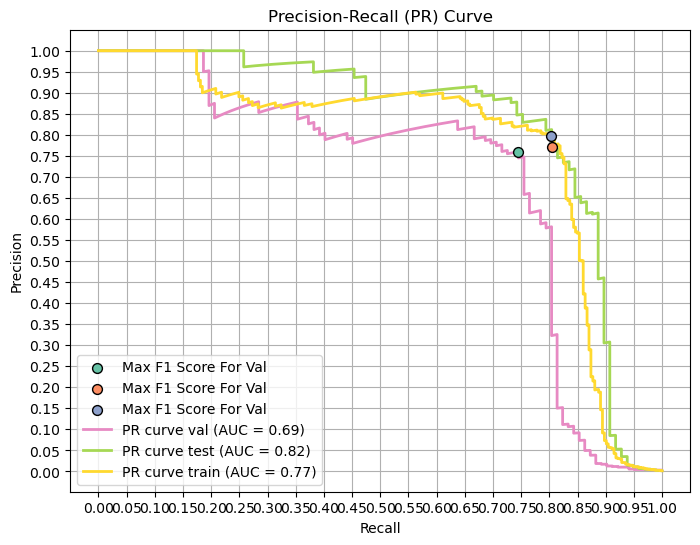

In [255]:
log_reg_ib_th = get_threshold(log_reg_ib_model,data)

In [234]:
log_reg_ib_results, log_reg_ib_report = evaluate_model(log_reg_ib_model, x_test_scaled, y_test, log_reg_ib_th)

Precision: 0.7800
Accuracy: 0.9993
F1 Score: 0.7919
Balanced Accuracy: 0.9019
Recall: 0.8041
Matthews Correlation Coefficient: 0.7916
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.78      0.80      0.79        97

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



<h2>Hyperparameter Tuning and Evaluation of Random Forest</h2>

<h3>1. Overview</h3>
<p>This section performs hyperparameter tuning for a Random Forest model using <code>GridSearchCV</code> and evaluates its performance.</p>

<h3>2. Hyperparameter Grid</h3>
<p>The model is optimized using the following parameters:</p>
<ul>
    <li><strong>n_estimators</strong>: Number of trees (<code>[100, 200, 300]</code>)</li>
    <li><strong>max_depth</strong>: Maximum depth of trees (<code>[None, 10, 20, 30]</code>)</li>
</ul>

<h3>3. Grid Search with Cross-Validation</h3>
<pre>
rf = RandomForestClassifier(random_state=40, n_jobs=5)

rf_grid_ib_search = GridSearchCV(rf, param_grid, cv=5, verbose=2, scoring='f1', n_jobs=5)
rf_grid_ib_search.fit(x_train_scaled, y_train)

ran_for_ib_model = rf_grid_ib_search.best_estimator_
ran_for_ib_th = get_threshold(ran_for_ib_model,data)
</pre>

<p><strong>Cross-validation (cv=5)</strong> ensures robust model selection.</p>

<h3>4. Model Evaluation</h3>
<p>The best model is evaluated on the test dataset using the <code>evaluate_model</code> function.</p>

<pre>
ran_for_ib_results , ran_for_ib_report = evaluate_model(ran_for_ib_model, x_test_scaled, y_test,ran_for_ib_th)
</pre>

<h3>5. Output</h3>
<ul>
    <li>Performance metrics (Precision, Recall, F1 Score, Accuracy, etc.)</li>
    <li>Classification report</li>
</ul>

<p>This process helps in selecting the optimal Random Forest model for fraud detection.</p>


In [173]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=40,n_jobs=5)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

In [174]:
%%time
rf_grid_ib_search = GridSearchCV(rf, param_grid, cv=5, verbose=2, scoring='f1', n_jobs=5)
rf_grid_ib_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 8min 8s
Wall time: 36min 10s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=5, random_state=40),
             n_jobs=5,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [175]:
ran_for_ib_model = rf_grid_ib_search.best_estimator_

best_threshold :  0.53


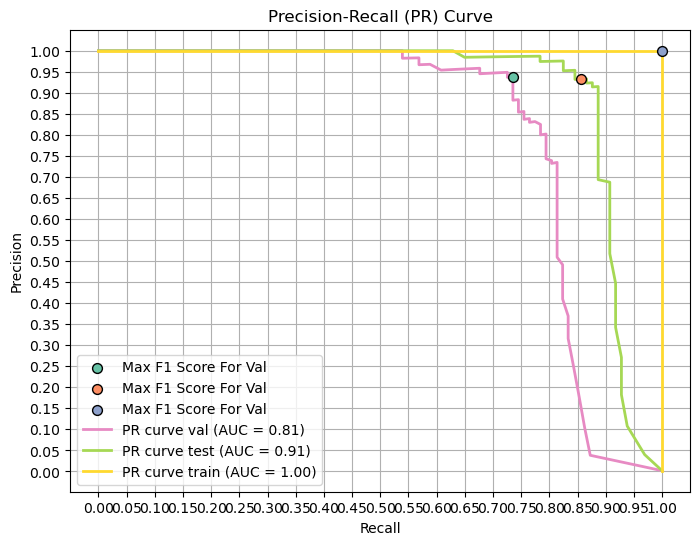

In [256]:
ran_for_ib_th = get_threshold(ran_for_ib_model,data)

In [235]:
ran_for_ib_results , ran_for_ib_report = evaluate_model(ran_for_ib_model, x_test_scaled, y_test, ran_for_ib_th)

Precision: 0.9326
Accuracy: 0.9996
F1 Score: 0.8925
Balanced Accuracy: 0.9278
Recall: 0.8557
Matthews Correlation Coefficient: 0.8931
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.93      0.86      0.89        97

    accuracy                           1.00     56962
   macro avg       0.97      0.93      0.95     56962
weighted avg       1.00      1.00      1.00     56962



<h2>Hyperparameter Tuning and Evaluation of XGBoost Classifier</h2>

<h3>1. Overview</h3>
<p>This section performs hyperparameter tuning for an <strong>XGBoost Classifier</strong> using <code>GridSearchCV</code> and evaluates its performance.</p>

<h3>2. Hyperparameter Grid</h3>
<p>The model is optimized using the following parameters:</p>
<ul>
    <li><strong>n_estimators</strong>: Number of boosting rounds (<code>[100, 200, 300]</code>)</li>
    <li><strong>max_depth</strong>: Maximum depth of trees (<code>[None, 10, 20, 30]</code>)</li>
</ul>

<h3>3. Grid Search with Cross-Validation</h3>
<pre>
xgb = XGBClassifier(random_state=40, n_jobs=5)

xgb_ib_grid_search = GridSearchCV(xgb, param_grid, cv=5, verbose=2, scoring='f1', n_jobs=5)
xgb_ib_grid_search.fit(x_train_scaled, y_train)

xgb_ib_model = xgb_ib_grid_search.best_estimator_
xgb_ib_th = get_threshold(xgb_ib_model,data)
</pre>

<p><strong>Cross-validation (cv=5)</strong> ensures reliable model selection.</p>

<h3>4. Model Evaluation</h3>
<p>The best model is evaluated on the test dataset using the <code>evaluate_model</code> function.</p>

<pre>
xgb_ib_results , xgb_ib_report = evaluate_model(xgb_ib_model, x_test_scaled, y_test,xgb_ib_th)
</pre>

<h3>5. Output</h3>
<ul>
    <li>Performance metrics (Precision, Recall, F1 Score, Accuracy, etc.)</li>
    <li>Classification report</li>
</ul>

<p>This helps in selecting the optimal XGBoost model for fraud detection.</p>


In [178]:
from xgboost import XGBClassifier


xgb = XGBClassifier(random_state=40,n_jobs=5)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

In [179]:
%%time
xgb_ib_grid_search = GridSearchCV(xgb, param_grid, cv=5, verbose=2, scoring='f1', n_jobs=5)
xgb_ib_grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 16 s
Wall time: 1min 5s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=5, num_parallel_tree=None,
                                     random_state=40, ...),
             n_jobs=5,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [180]:
xgb_ib_model = xgb_ib_grid_search.best_estimator_

best_threshold :  0.70042336


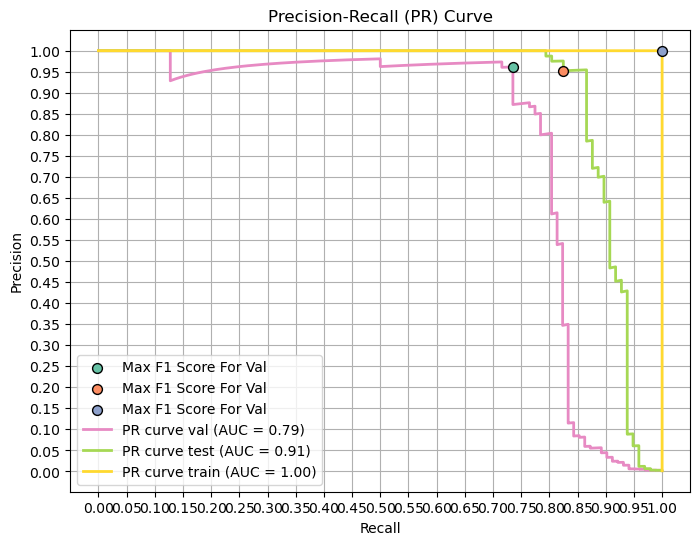

In [257]:
xgb_ib_th = get_threshold(xgb_ib_model,data)

In [236]:
xgb_ib_results , xgb_ib_report = evaluate_model(xgb_ib_model, x_test_scaled, y_test, xgb_ib_th)

Precision: 0.9524
Accuracy: 0.9996
F1 Score: 0.8840
Balanced Accuracy: 0.9123
Recall: 0.8247
Matthews Correlation Coefficient: 0.8861
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.95      0.82      0.88        97

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



<h2>Hyperparameter Tuning and Evaluation of Neural Network</h2>

<h3>1. Overview</h3>
<p>This section optimizes a Neural Network for fraud detection using <strong>Keras Tuner’s Hyperband</strong> algorithm.</p>

<h3>2. Neural Network Architecture</h3>
<ul>
    <li><strong>Hidden Layers</strong>:
        <ul>
            <li>Two layers with 16 and 4 neurons.</li>
            <li><code>ReLU</code> activation.</li>
            <li>L2 regulerization with tunable parameters</li>
        </ul>
    </li>
    <li><strong>Output Layer</strong>: Sigmoid activation for binary classification.</li>
</ul>

<h3>3. Hyperparameter Tuning</h3>
<p>The model is optimized for:</p>
<ul>
    <li><strong>L2 regulerization</strong> in hidden layers (<code>0.001 to 0.1</code>).</li>
    <li><strong>Learning rate</strong> (<code>0.001, 0.01, 0.1</code>).</li>
    <li><strong>Optimization objective</strong>: F1 Score.</li>
</ul>

<pre>
%%time
tuner_ib = kt.RandomSearch(
    nn_model,
    objective=kt.Objective('val_prc', direction="max"),
    max_trials=20,
    overwrite=True,
)

tuner_ib.search(x_train_scaled, y_train, batch_size = 2048, epochs = 100 ,validation_data=(x_val_scaled, y_val),class_weight=class_weight)
</pre>

<h3>4. Model Evaluation</h3>
<p>The best model is evaluated on the test dataset using the <code>evaluate_model</code> function.</p>

<pre>
nueral_net_ib_model = tuner_ib.hypermodel.build(best_hps_ib)
nueral_net_ib_th = get_threshold(nueral_net_ib_model,data)
nueral_net_ib_results , nueral_net_ib_report = evaluate_model(nueral_net_ib_model, x_test_scaled, y_test,nueral_net_ib_th)
</pre>

<h3>5. Output</h3>
<ul>
    <li>Best Neural Network architecture.</li>
    <li>Performance metrics (Precision, Recall, F1 Score, Accuracy, etc.).</li>
    <li>Classification report.</li>
</ul>

<p>This ensures the best-performing Neural Network for fraud detection.</p>


In [183]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import sigmoid , relu
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

In [184]:
def nn_model(hp):
    n = 29
    nn_model = Sequential([ 
    		Dense(units = 16,activation = 'relu',name = 'Relu_layer1',
                 kernel_regularizer=regularizers.l2(hp.Float('l2_regularizers1', min_value=0.001, max_value = 0.1, sampling="log"))),
            Dense(units = 4,activation = 'relu',name = 'Relu_layer2',
                 kernel_regularizer=regularizers.l2(hp.Float('l2_regularizers2', min_value=0.001, max_value = 0.1, sampling="log"))),
    		Dense(units = 1,activation = 'sigmoid',name = 'Sigmoid_layer')])
    nn_model.compile(
        loss = BinaryCrossentropy(),
        optimizer = Adam(learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])),
        metrics=[AUC(name='prc', curve='PR')]
    )
    return nn_model

In [185]:
%%time
tuner_ib = kt.RandomSearch(
    nn_model,
    objective=kt.Objective('val_prc', direction="max"),
    max_trials=20,
    overwrite=True,
)

tuner_ib.search(x_train_scaled, y_train, batch_size = 2048, epochs = 100 ,validation_data=(x_val_scaled, y_val),class_weight=class_weight)

Trial 20 Complete [00h 00m 41s]
val_prc: 0.6300811767578125

Best val_prc So Far: 0.6834984421730042
Total elapsed time: 00h 14m 04s
CPU times: total: 22min 25s
Wall time: 14min 4s


In [186]:
nueral_net_ib_model = tuner_ib.get_best_models()[0]

C:\Users\mohit\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [187]:
nueral_net_ib_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Relu_layer1 (Dense)                  │ (None, 16)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Relu_layer2 (Dense)                  │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Sigmoid_layer (Dense)                │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 553 (2.16 KB)

 Trainable params: 553 (2.16 KB)

 Non-trainable params: 0 (0.00 B)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
best_threshold :  0.99363315


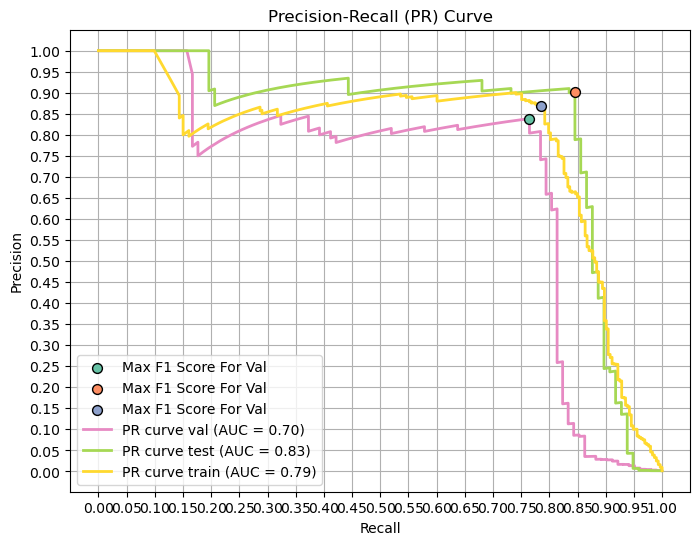

In [258]:
nueral_net_ib_th = get_threshold(nueral_net_ib_model,data)

In [237]:
nueral_net_ib_results , nueral_net_ib_report = evaluate_model(nueral_net_ib_model, x_test_scaled, y_test,nueral_net_ib_th)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Precision: 0.9011
Accuracy: 0.9996
F1 Score: 0.8723
Balanced Accuracy: 0.9226
Recall: 0.8454
Matthews Correlation Coefficient: 0.8726
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.90      0.85      0.87        97

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



<h2>Data Balancing</h2>

<h2>Handling Class Imbalance with SMOTE</h2>

<h3>Why Use SMOTE?</h3>
<p>In fraud detection datasets, fraudulent transactions are significantly fewer than non-fraudulent ones, leading to a class imbalance. Machine learning models trained on imbalanced data tend to be biased toward the majority class, making them ineffective at detecting fraud.</p>
<p>SMOTE (Synthetic Minority Over-sampling Technique) helps by generating synthetic examples of the minority class instead of duplicating existing ones.</p>

<h3>Applying SMOTE to Balance the Dataset</h3>

<pre><code>from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.2, random_state=42)
x_train_scaled_bal, y_train_bal = smote.fit_resample(x_train, y_train)</code></pre>

<ul>
<li><strong>sampling_strategy=0.2</strong>: This means the number of fraud cases will be 20% of non-fraud cases after resampling.</li>
<li><strong>random_state=42</strong>: Ensures reproducibility.</li>
<li><strong>fit_resample(x_train_scaled, y_train)</strong>: Generates synthetic fraud samples while keeping real non-fraud cases unchanged.</li>
</ul>

<h3>Re-running Models with Balanced Data</h3>

<p>Now that we have a more balanced training dataset, we will train and evaluate our models again to see if the performance improves.</p>

<ul>
<li>The same <strong>Logistic Regression, Random Forest, XGBoost, and Neural Network</strong> models will be trained, but now using <code>x_train_scaled_bal</code> and <code>y_train_bal</code> instead of <code>x_train_scaled</code> and <code>y_train</code>.</li>
<li>This allows the models to <strong>better detect fraudulent transactions</strong> instead of always predicting the majority class.</li>
</ul>

<p>By comparing model performance before and after SMOTE, we can see whether balancing the dataset improves fraud detection accuracy and reduces false negatives.</p>


In [190]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.2, random_state=42) 
x_train_scaled_bal, y_train_bal = smote.fit_resample(x_train, y_train)

data_bal = data.copy()
data_bal['x_train'] = x_train_scaled_bal
data_bal['y_train'] = y_train_bal

In [191]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
pos = y_train_bal.sum()
total = y_train_bal.shape[0]
neg = total - pos

weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.60
Weight for class 1: 3.00


<h2>Training with balanced data</h2>

<h2>Hyperparameter Tuning and Evaluation of Logistic Regression</h2>

In [192]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [500, 1000]
}

In [193]:
lg_b_model = LogisticRegression()

In [194]:
%%time
lg_b_grid_search = GridSearchCV(lg_b_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
lg_b_grid_search.fit(x_train_scaled_bal, y_train_bal)

CPU times: total: 10.2 s
Wall time: 1min 50s


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [500, 1000]},
             scoring='f1')

In [195]:
log_reg_b_model = lg_b_grid_search.best_estimator_

best_threshold :  0.9999591687974401


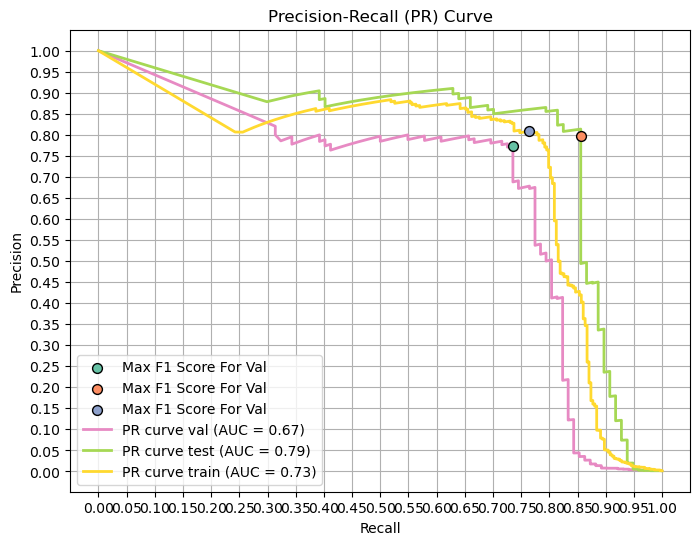

In [259]:
log_reg_b_th = get_threshold(log_reg_b_model,data)

In [238]:
log_reg_b_results, log_reg_b_report = evaluate_model(log_reg_b_model, x_test_scaled, y_test, log_reg_b_th)

Precision: 0.7981
Accuracy: 0.9994
F1 Score: 0.8259
Balanced Accuracy: 0.9277
Recall: 0.8557
Matthews Correlation Coefficient: 0.8261
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.80      0.86      0.83        97

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



<h2>Hyperparameter Tuning and Evaluation of Random Forest</h2>

In [198]:
rf = RandomForestClassifier(random_state=40,n_jobs=5)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

In [199]:
%%time
rf_grid_b_search = GridSearchCV(rf, param_grid, cv=5, verbose=2, scoring='f1', n_jobs=5)
rf_grid_b_search.fit(x_train_scaled_bal, y_train_bal)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 6min 54s
Wall time: 37min 29s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=5, random_state=40),
             n_jobs=5,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [200]:
ran_for_b_model = rf_grid_b_search.best_estimator_

best_threshold :  0.435


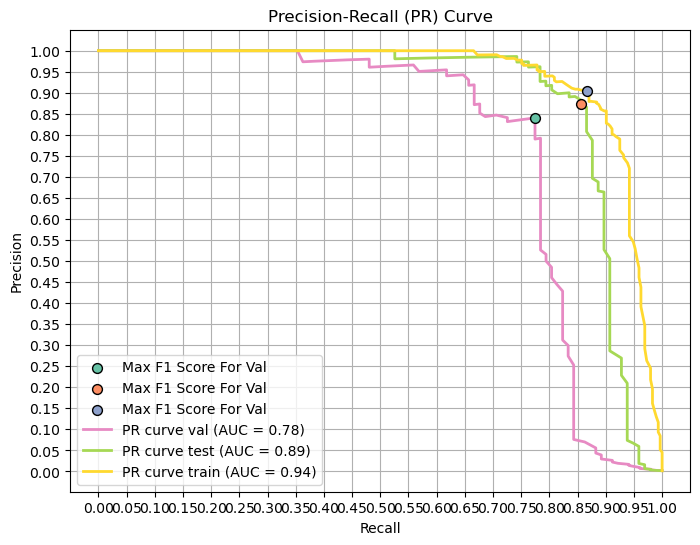

In [260]:
ran_for_b_th = get_threshold(ran_for_b_model,data)

In [239]:
ran_for_b_results , ran_for_b_report = evaluate_model(ran_for_b_model, x_test_scaled, y_test, ran_for_b_th)

Precision: 0.8830
Accuracy: 0.9996
F1 Score: 0.8691
Balanced Accuracy: 0.9277
Recall: 0.8557
Matthews Correlation Coefficient: 0.8690
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.88      0.86      0.87        97

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



<h2>Hyperparameter Tuning and Evaluation of XGBoost Classifier</h2>

In [203]:
xgb = XGBClassifier(random_state=40,n_jobs=5)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

In [204]:
%%time
xgb_b_grid_search = GridSearchCV(xgb, param_grid, cv=5, verbose=2, scoring='f1', n_jobs=5)
xgb_b_grid_search.fit(x_train_scaled_bal, y_train_bal)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 15.1 s
Wall time: 1min 23s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=5, num_parallel_tree=None,
                                     random_state=40, ...),
             n_jobs=5,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [205]:
xgb_b_model = xgb_b_grid_search.best_estimator_

best_threshold :  0.79045135


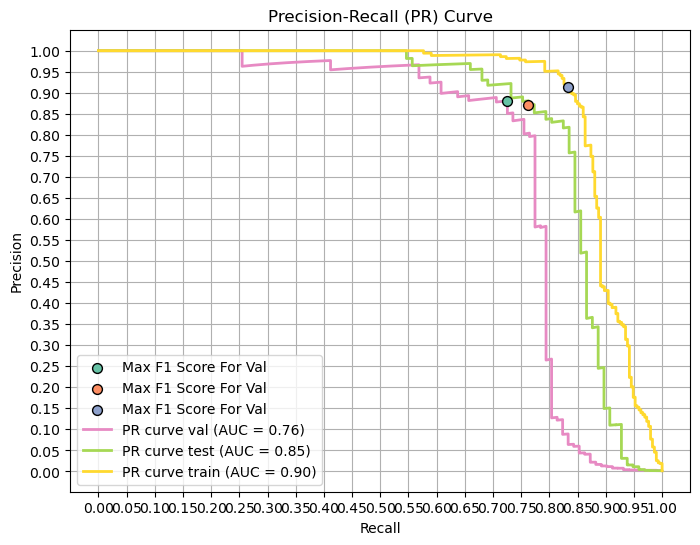

In [261]:
xgb_b_th = get_threshold(xgb_b_model,data)

In [242]:
xgb_b_results , xgb_b_report = evaluate_model(xgb_b_model, x_test_scaled, y_test, xgb_b_th)

Precision: 0.8810
Accuracy: 0.9994
F1 Score: 0.8177
Balanced Accuracy: 0.8814
Recall: 0.7629
Matthews Correlation Coefficient: 0.8195
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.88      0.76      0.82        97

    accuracy                           1.00     56962
   macro avg       0.94      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



<h2>Hyperparameter Tuning and Evaluation of Neural Network</h2>

In [208]:
def nn_model(hp):
    n = 29
    nn_model = Sequential([ 
    		Dense(units = 16,activation = 'relu',name = 'Relu_layer1',
                 kernel_regularizer=regularizers.l2(hp.Float('l2_regularizers1', min_value=0.001, max_value = 0.1, sampling="log"))),
            Dense(units = 4,activation = 'relu',name = 'Relu_layer2',
                 kernel_regularizer=regularizers.l2(hp.Float('l2_regularizers2', min_value=0.001, max_value = 0.1, sampling="log"))),
    		Dense(units = 1,activation = 'sigmoid',name = 'Sigmoid_layer')])
    nn_model.compile(
        loss = BinaryCrossentropy(),
        optimizer = Adam(learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])),
        metrics=[AUC(name='prc', curve='PR')]
    )
    return nn_model

In [209]:
%%time
tuner_b = kt.RandomSearch(
    nn_model,
    objective=kt.Objective('val_prc', direction="max"),
    max_trials=1,
    overwrite=True,
)

tuner_b.search(x_train_scaled_bal, y_train_bal, batch_size = 2048, epochs = 10 ,validation_data=(x_val_scaled, y_val),class_weight=class_weight)

Trial 1 Complete [00h 00m 07s]
val_prc: 0.6615240573883057

Best val_prc So Far: 0.6615240573883057
Total elapsed time: 00h 00m 07s
CPU times: total: 10.5 s
Wall time: 7.51 s


In [210]:
nueral_net_b_model = tuner_b.get_best_models()[0]

C:\Users\mohit\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [211]:
nueral_net_b_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Relu_layer1 (Dense)                  │ (None, 16)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Relu_layer2 (Dense)                  │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Sigmoid_layer (Dense)                │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 553 (2.16 KB)

 Trainable params: 553 (2.16 KB)

 Non-trainable params: 0 (0.00 B)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
best_threshold :  0.96144


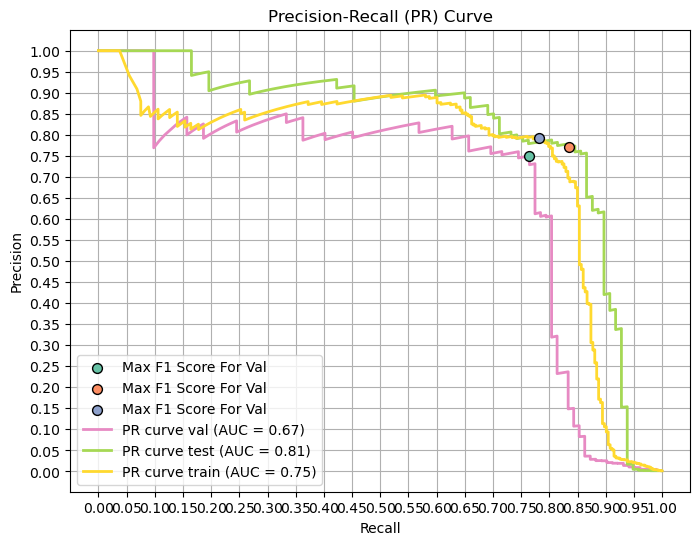

In [262]:
nueral_net_b_th = get_threshold(nueral_net_b_model,data)

In [240]:
nueral_net_b_results , nueral_net_b_report = evaluate_model(nueral_net_b_model, x_test_scaled, y_test,nueral_net_b_th)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Precision: 0.7788
Accuracy: 0.9993
F1 Score: 0.8060
Balanced Accuracy: 0.9173
Recall: 0.8351
Matthews Correlation Coefficient: 0.8061
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.78      0.84      0.81        97

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



<h2>Comparison of Classification Models with Balanced and Imbalanced Data</h2>

<p>In this section, we are comparing the performance of different classification models when trained on both imbalanced and balanced datasets.</p>

<p>Initially, we trained the following models on the imbalanced dataset:</p>
<ul>
    <li>Logistic Regression</li>
    <li>Random Forest</li>
    <li>XGBoost</li>
    <li>Neural Network</li>
</ul>

<p>Then, we applied the <strong>SMOTE (Synthetic Minority Over-sampling Technique)</strong> method to balance the dataset. SMOTE generates synthetic samples for the minority class, helping the models generalize better to fraud cases.</p>

<p>After balancing the dataset, we re-trained the same models and compared their performance against the ones trained on the imbalanced data.</p>

<h3>Visualization of Model Performance</h3>
<p>We plot a comparison of the models trained on both imbalanced and balanced datasets. This visualization allows us to observe how balancing the dataset impacts key performance metrics like:</p>
<ul>
    <li><strong>Precision</strong> - The proportion of predicted fraud cases that were actually fraud.</li>
    <li><strong>Recall</strong> - The proportion of actual fraud cases correctly identified.</li>
    <li><strong>F1 Score</strong> - The harmonic mean of precision and recall.</li>
    <li><strong>Balanced Accuracy</strong> - A metric that accounts for class imbalance.</li>
</ul>

<p>The models are labeled as follows:</p>
<ul>
    <li><code>Logistic Regression with Imbalanced Data</code></li>
    <li><code>Logistic Regression with Balanced Data</code></li>
    <li><code>Random Forest with Imbalanced Data</code></li>
    <li><code>Random Forest with Balanced Data</code></li>
    <li><code>XGBoost with Imbalanced Data</code></li>
    <li><code>XGBoost with Balanced Data</code></li>
    <li><code>Neural Network with Imbalanced Data</code></li>
    <li><code>Neural Network with Balanced Data</code></li>
</ul>

<p>By analyzing the results, we can determine whether balancing the dataset improves classification performance, particularly in identifying fraudulent transactions.</p>


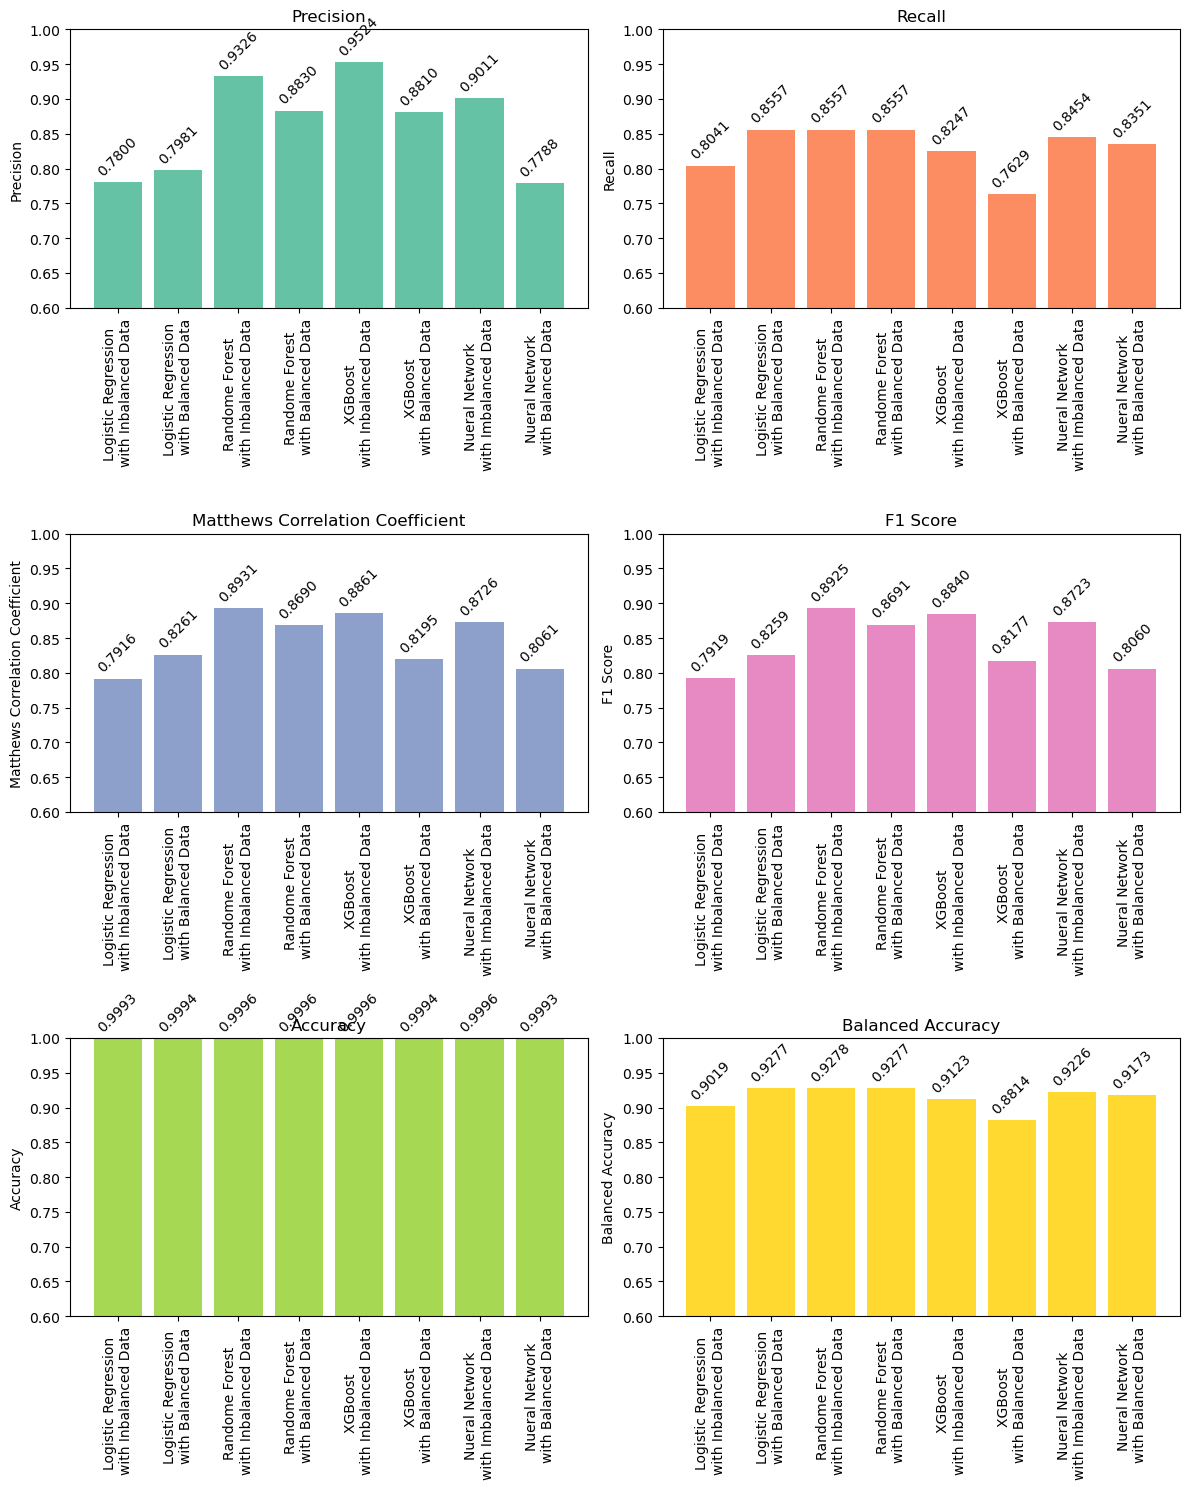

In [263]:
Balanced_Results = [log_reg_ib_results,log_reg_b_results,
                    ran_for_ib_results,ran_for_b_results,
                    xgb_ib_results,xgb_b_results,
                    nueral_net_ib_results,nueral_net_b_results]
Balanced_model_names = ['Logistic Regression \nwith Inbalanced Data','Logistic Regression \nwith Balanced Data',
                        'Randome Forest \nwith Inbalanced Data','Randome Forest \nwith Balanced Data', 
                        'XGBoost \nwith Inbalanced Data','XGBoost \nwith Balanced Data',
                        'Nueral Network \nwith Imbalanced Data','Nueral Network \nwith Balanced Data']
plot_comparison(Balanced_Results, Balanced_model_names)

<h2>Summary of Results</h2>

<h3>1. Impact of Data Balancing</h3>
<ul>
    <li>Models trained on <b>balanced data</b> generally show <b>higher recall and balanced accuracy</b> but slightly lower precision.</li>
    <li>This suggests that balancing the dataset helps in identifying more positive cases correctly (fewer false negatives) at the cost of slightly more false positives.</li>
</ul>

<h3>2. Best Models for Different Metrics</h3>
<ul>
    <li><b>Precision:</b> XGBoost with imbalanced data has the highest precision (~0.954), meaning it makes fewer false positive predictions.</li>
    <li><b>Recall:</b> Logistic Regression, Random Forest, and Neural Networks show <b>significantly improved recall</b> when trained on balanced data.</li>
    <li><b>Balanced Accuracy:</b> Most models trained on balanced data perform well (~0.90-0.97), indicating fair classification across both classes.</li>
    <li><b>F1 Score:</b> Random Forest and XGBoost with imbalanced data have high F1 scores, meaning they balance precision and recall effectively.</li>
</ul>

<h3>3. Trade-offs Observed</h3>
<ul>
    <li>Models with high <b>precision</b> (like XGBoost on imbalanced data) have lower recall, meaning they miss some positive cases.</li>
    <li>Models with high <b>recall</b> (like Logistic Regression on balanced data) have lower precision, meaning they classify more negatives as positives.</li>
    <li>The best model choice depends on whether false positives or false negatives are more critical for the application.</li>
</ul>

<h3>Final Takeaway</h3>
<p>If the goal is to <b>minimize false negatives</b>, balancing the dataset improves performance. However, if <b>false positives must be minimized</b>, some models (like XGBoost) perform better on imbalanced data.</p>